# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#lets load the data set in our system 
#The prediction task is to determine whether a person makes over $50K a year.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df=pd.read_csv('cencus.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA Process:
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

observations:

1.from above code we find that major variables are object data type so we have to convert them into int data type by using label encoder.

In [5]:
df.shape

(32560, 15)

observations:
1. 32560 rows and 15 columns are present in dataset

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

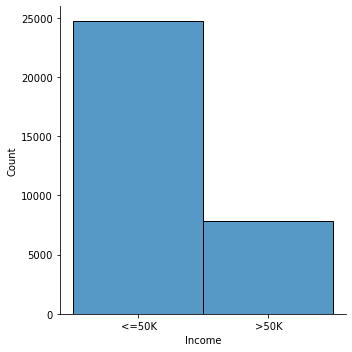

In [8]:
sns.displot(df['Income'])

Observations:

    1.As seen from above distribution plot that Incomes are not equally distributed,Hence we have to use imbalance learn for data balancing.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


observations:

1.from above code we can easily find that there is no nan values are fresent in dataset.

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

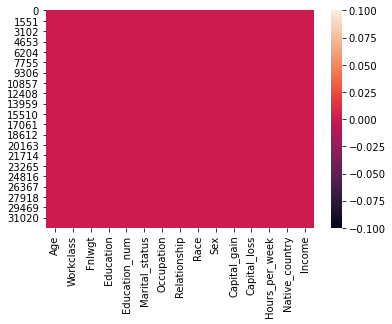

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

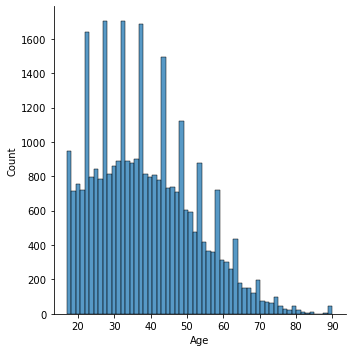

In [12]:
sns.displot(df['Age'])

Observations:

    1. from above ploting we can easily find that data is not distributed normally.
    2. major persons are from age group 20-60 ages.

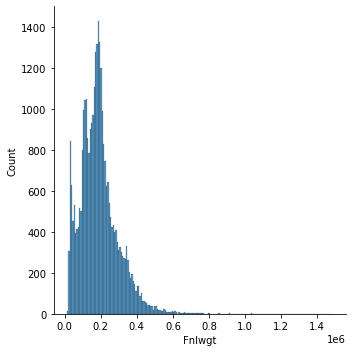

In [13]:
sns.displot(df['Fnlwgt'])

Observations:

    1. from above ploting we can easily find that data is not distributed normally.
    2. Final weight is distributes from 0.1-0.3 .

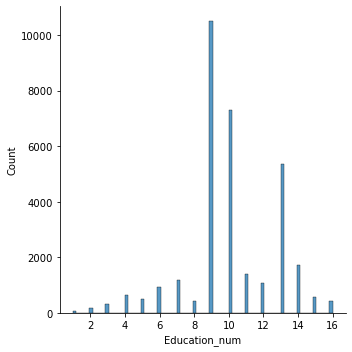

In [14]:
sns.displot(df['Education_num'])

Observations:

1. from above ploting we can easily find that data is not distributed normally.
2. Education num  highest is 16,lowest is 2 and maximum persons are having 9 number. .

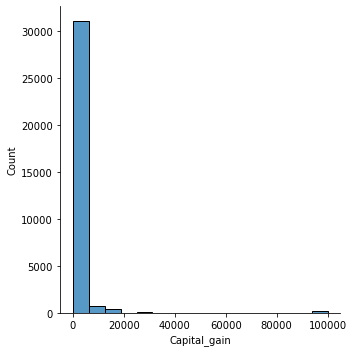

In [15]:
sns.displot(df['Capital_gain'])

Observations:

    1.from above ploting we can easily find that data is not distributed normally.
    2.seems that not many people gaining capitally .

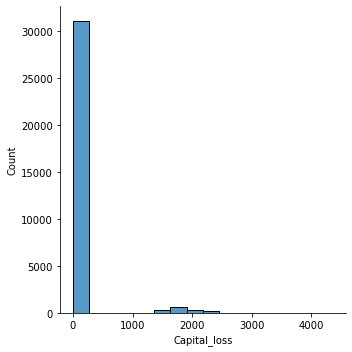

In [16]:
sns.displot(df['Capital_loss'])

Observations:

    1.from above ploting we can easily find that data is not distributed normally.
    2.seems that not many people loss there capital. .

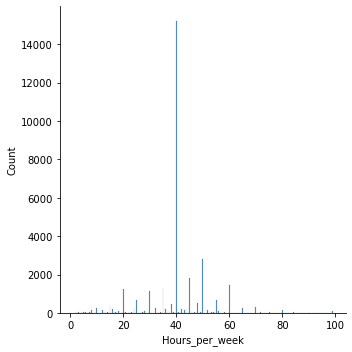

In [17]:
sns.displot(df['Hours_per_week'])

Observations:

    1.from above ploting we can easily find that data is not distributed normally.
    2.Maximum people work 40 hours per week. 
    3.people work from 1 hour to 100 hous as per there choice.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

<AxesSubplot:xlabel='Race', ylabel='Age'>

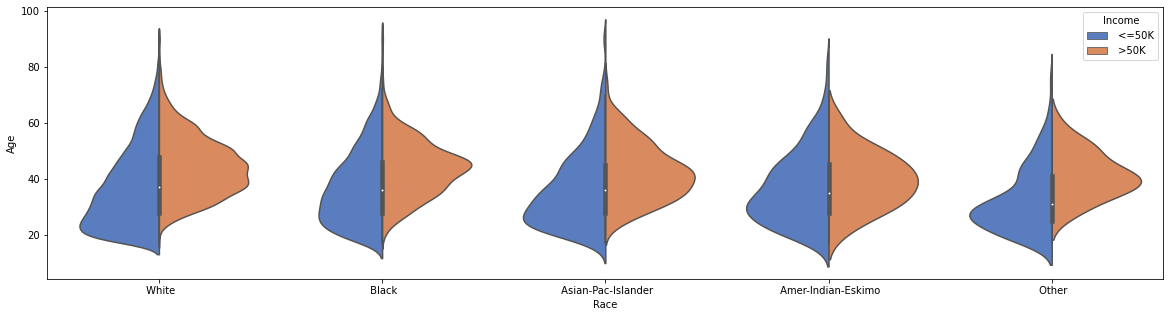

In [18]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Race", y="Age", hue="Income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observations:
    1.Race is not defined the Salary.


<AxesSubplot:xlabel='Workclass', ylabel='Age'>

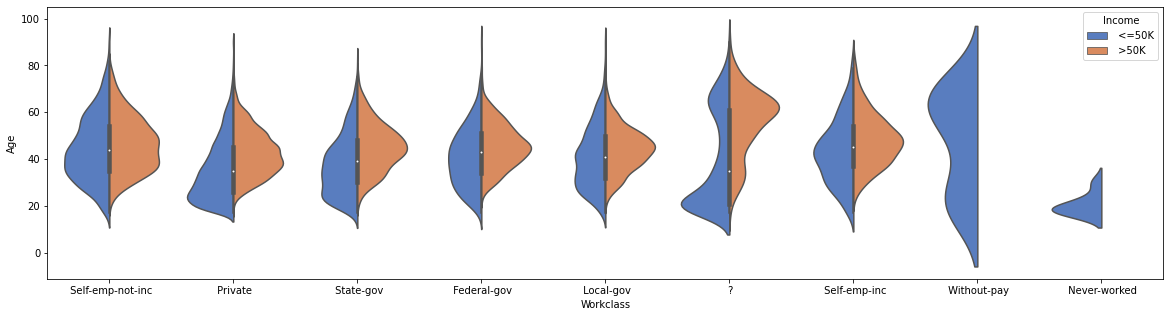

In [19]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Workclass", y="Age", hue="Income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observations:

    1.More senior workers have higher salaries. Armed-forces don't have a high job salaries.

    2.Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

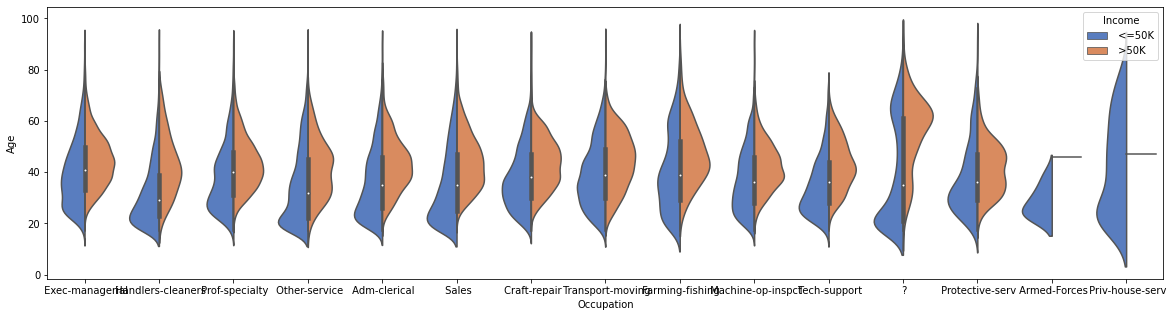

In [20]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Occupation", y="Age", hue="Income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

observations:

    1. Managers getting high salary.
    
    2. Prof-speciality other servises among getting high paid salaries.
    
    3. Armed forces and priv house serv getting lower incomes.

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [22]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Observations:
    1. 0 means income less then 50k dollor.
    2. 1 means income more then 50k dollor.

# Now use subplot and displot to check data are normalised or not.

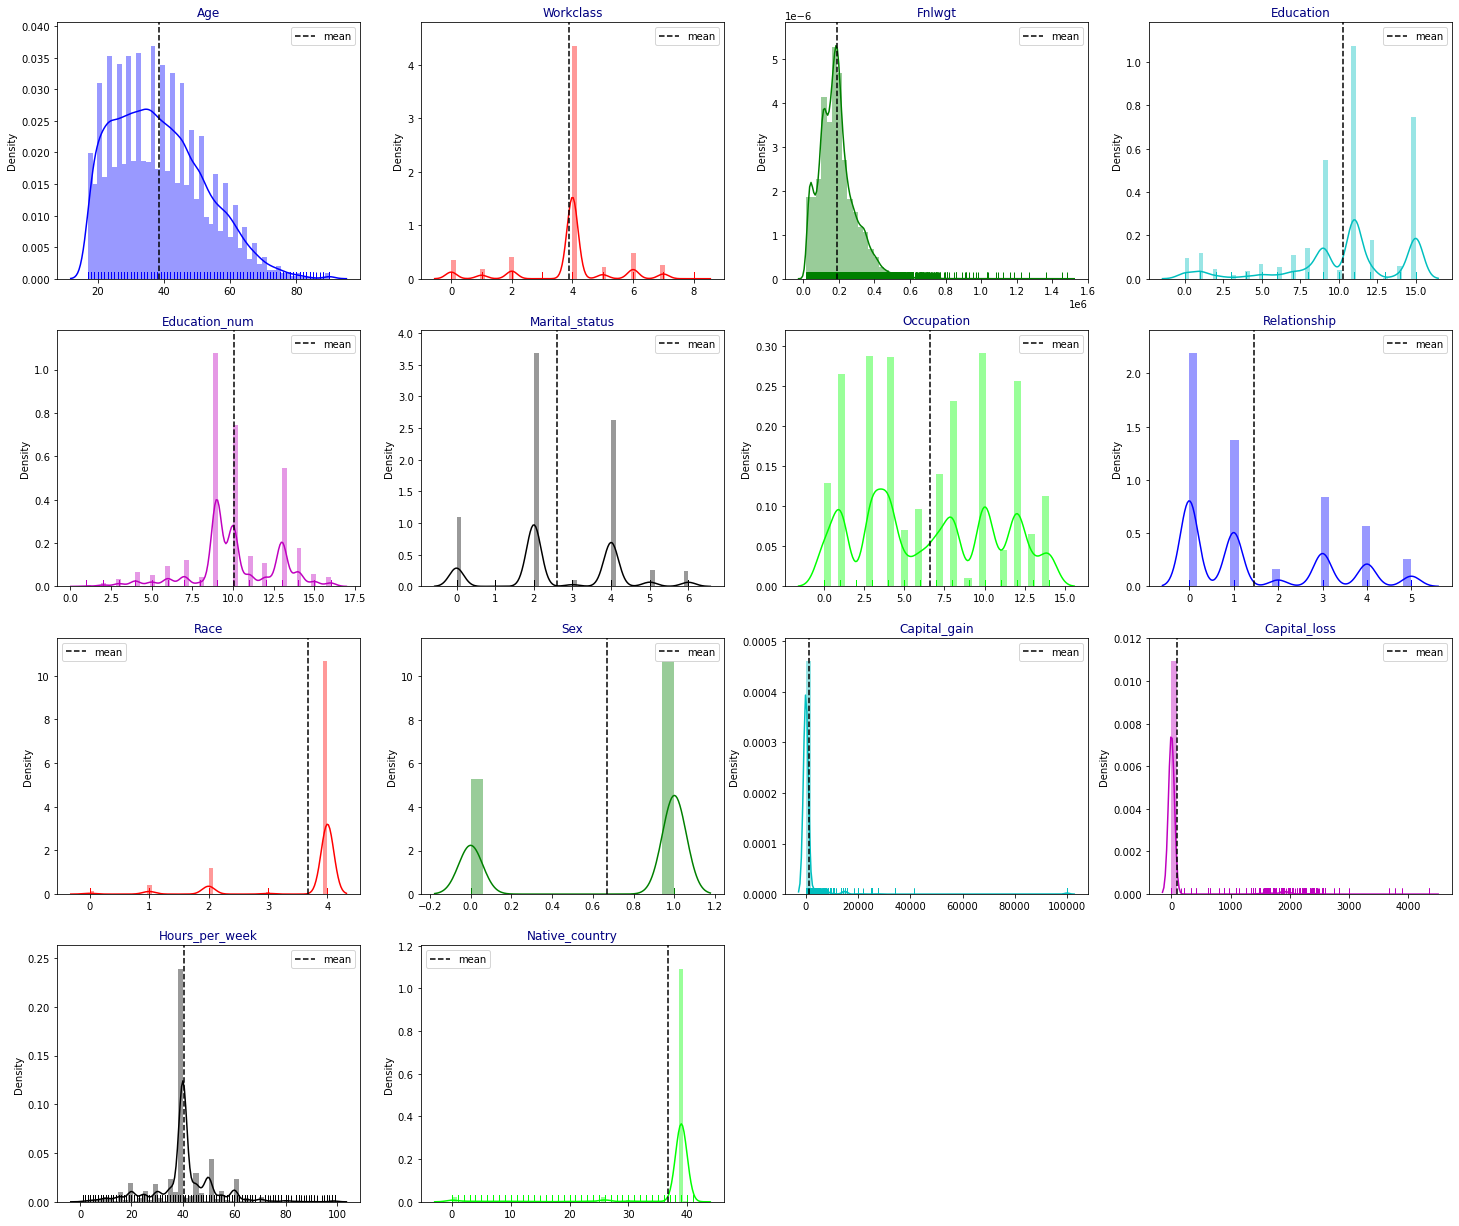

In [23]:
import itertools
import matplotlib.pyplot as plt
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

# CORRELATION BETWEEN THE COLUMNS:

In [24]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


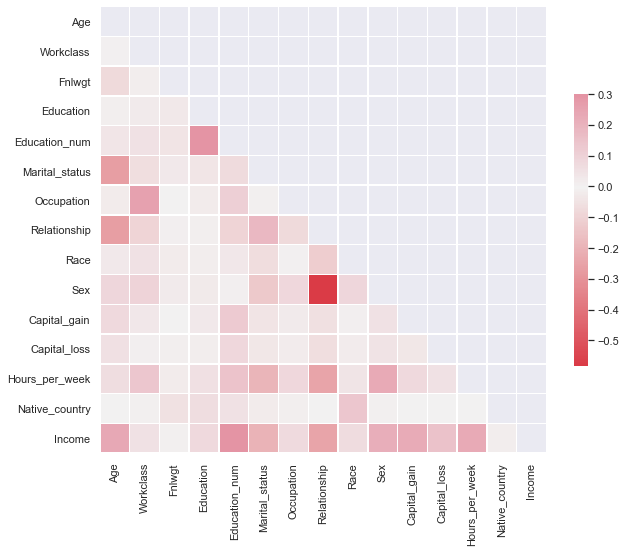

In [25]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

observations:
    1. Darker the colour negative the relation with target column.
    2. lighter the colour good is the relation with target column. 

<AxesSubplot:>

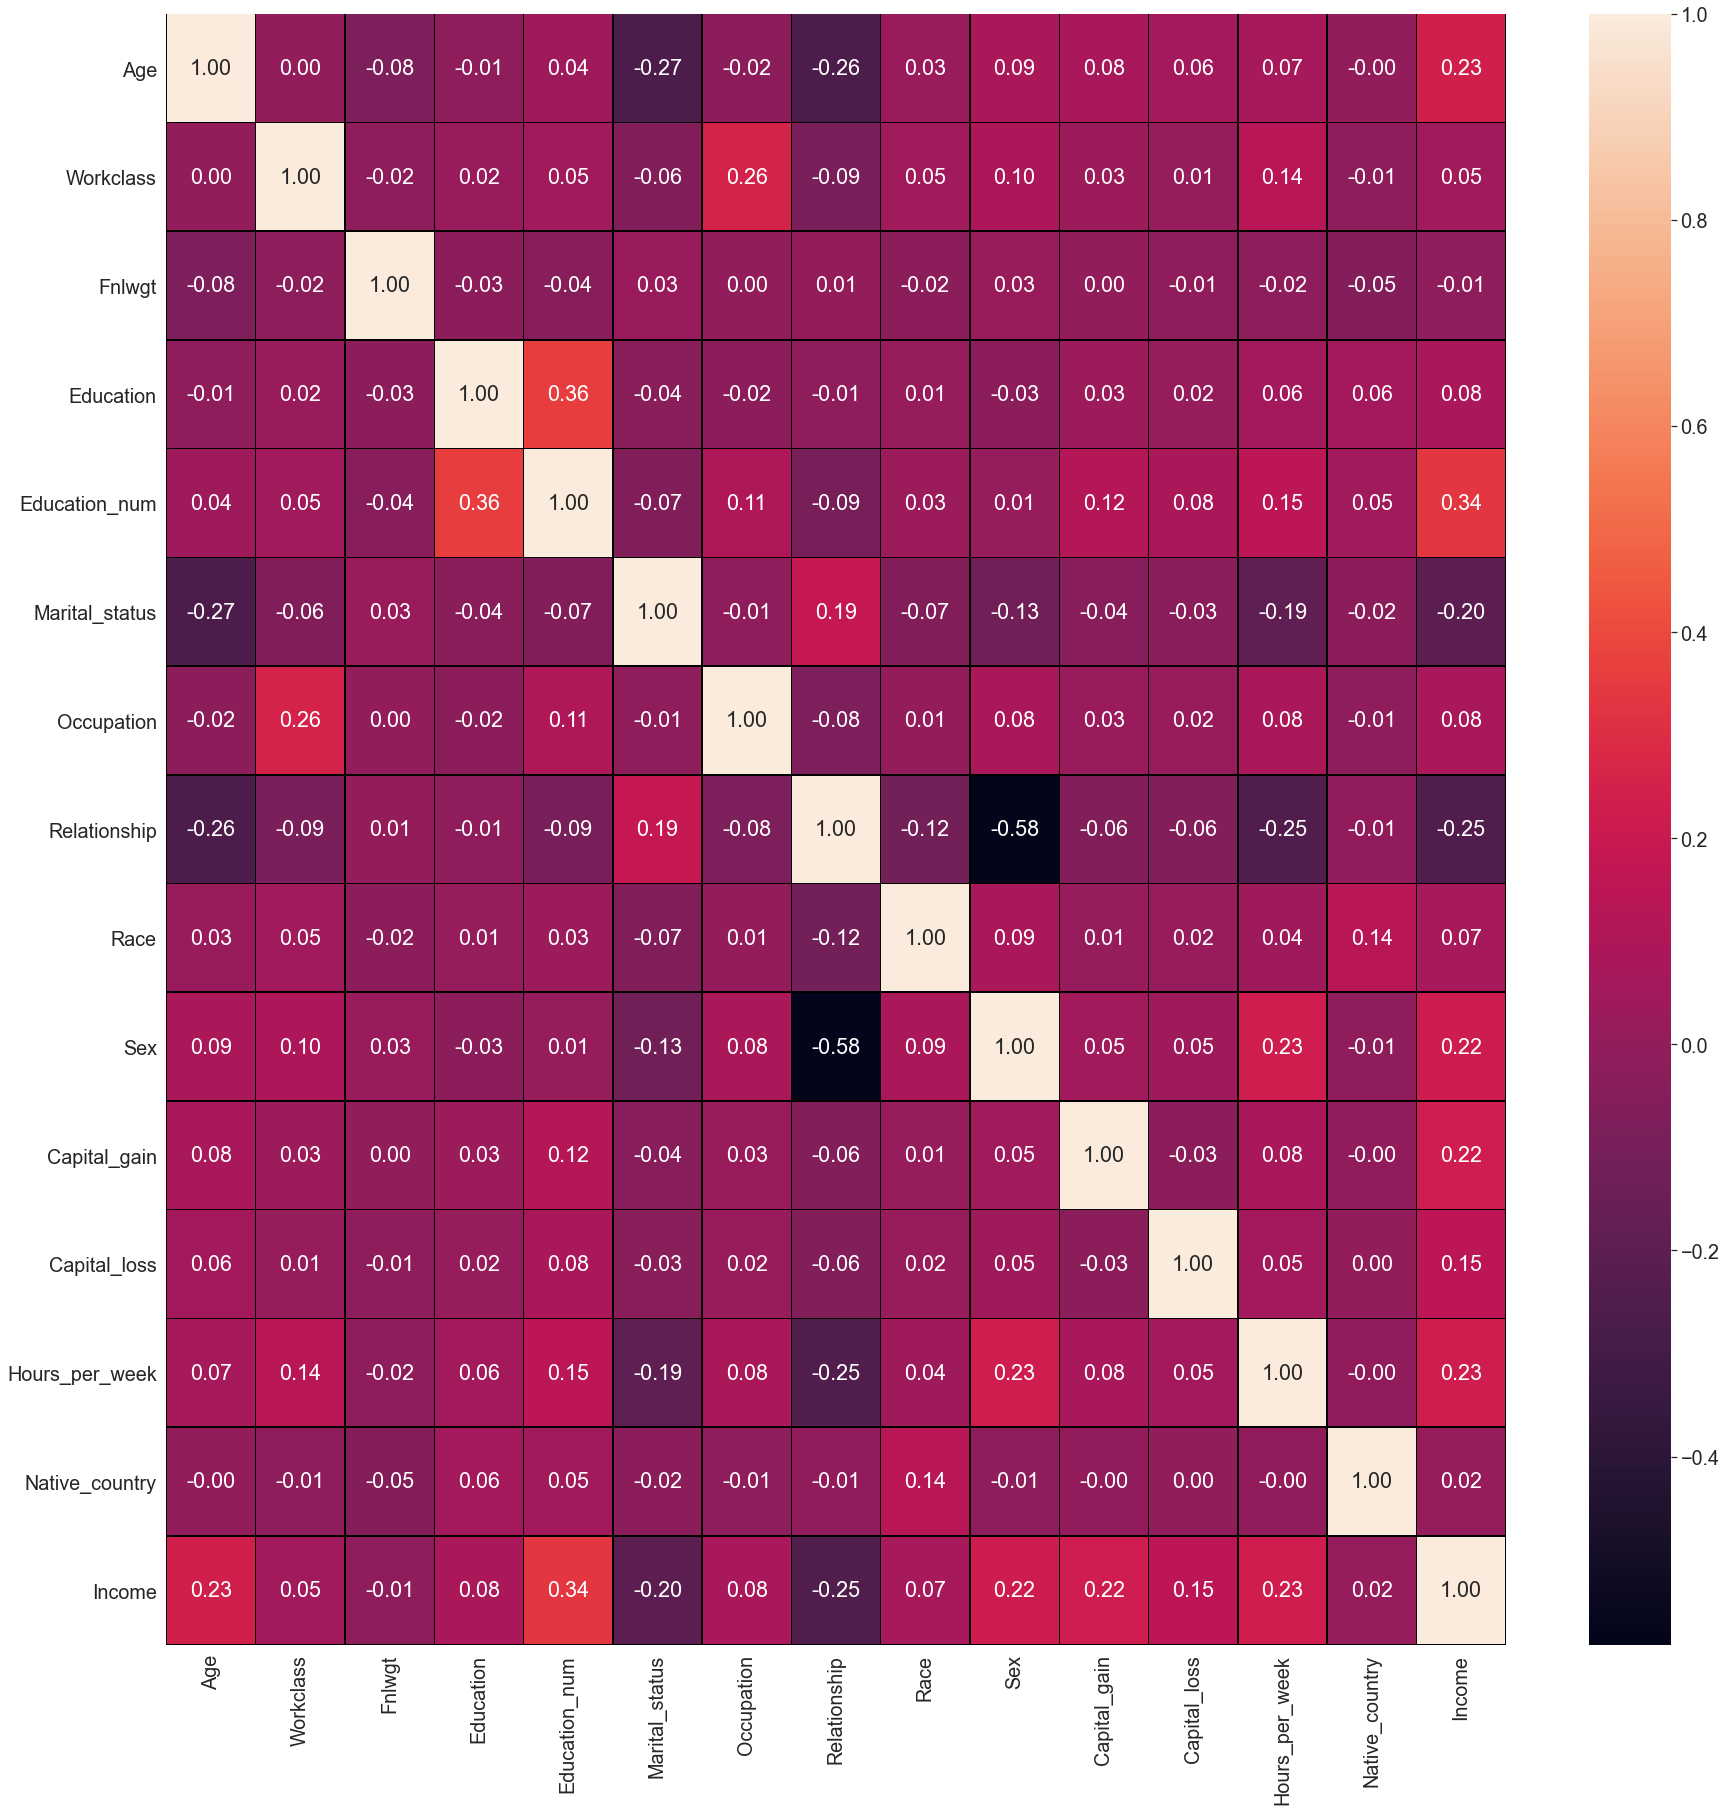

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

observations:

    1.Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.

    2.The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.
    
    3.final weight making negative relation with target column.
    
    4. Marital_status and Relationship is in negatively related with target column,which means that there is no impact on income weather a person is single or married. 

# Discription of dataset

In [27]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


observations:
    1. there is huge difference between 75% and max % so there is outliers are present.
    2. capital loss and capital gain also having outliers 75% having no value but max have.

# PLOTTING THE DISCRIPTION OF DATASET

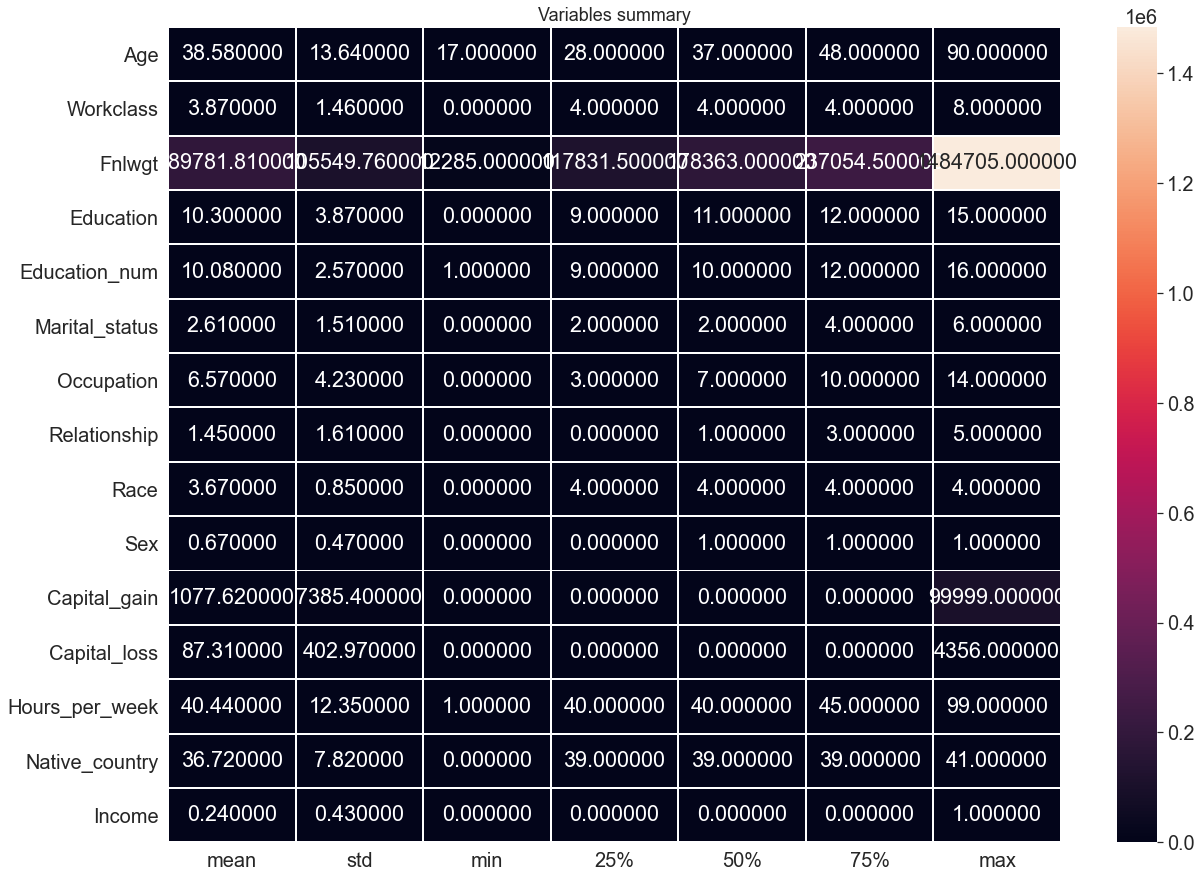

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale=1.5)
plt.title("Variables summary")
plt.show()


From above ploting we can easily look at mean,std-deviation,min and max values of each columns,it helps in futher data cleaning.

In [30]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
x=df.drop('Income', axis=1)

In [33]:
x.shape

(32560, 14)

In [34]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [35]:
y=df["Income"]

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [37]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [38]:
vif_calc()

    VIF Factor        features
0     8.521048             Age
1     8.476048       Workclass
2     4.031761          Fnlwgt
3     9.210456       Education
4    18.379852   Education_num
5     3.976061  Marital_status
6     3.711144      Occupation
7     2.612271    Relationship
8    17.577780            Race
9     4.441515             Sex
10    1.044795    Capital_gain
11    1.061819    Capital_loss
12   12.147128  Hours_per_week
13   19.726097  Native_country


In [39]:
df = df.drop(['Capital_loss','Relationship','Marital_status'], axis=1)

we drop highly correlated columns..

# Checking the Correlation Matrix

After dropping highly negative and correlated variables now let's check the correlation matrix again

<AxesSubplot:>

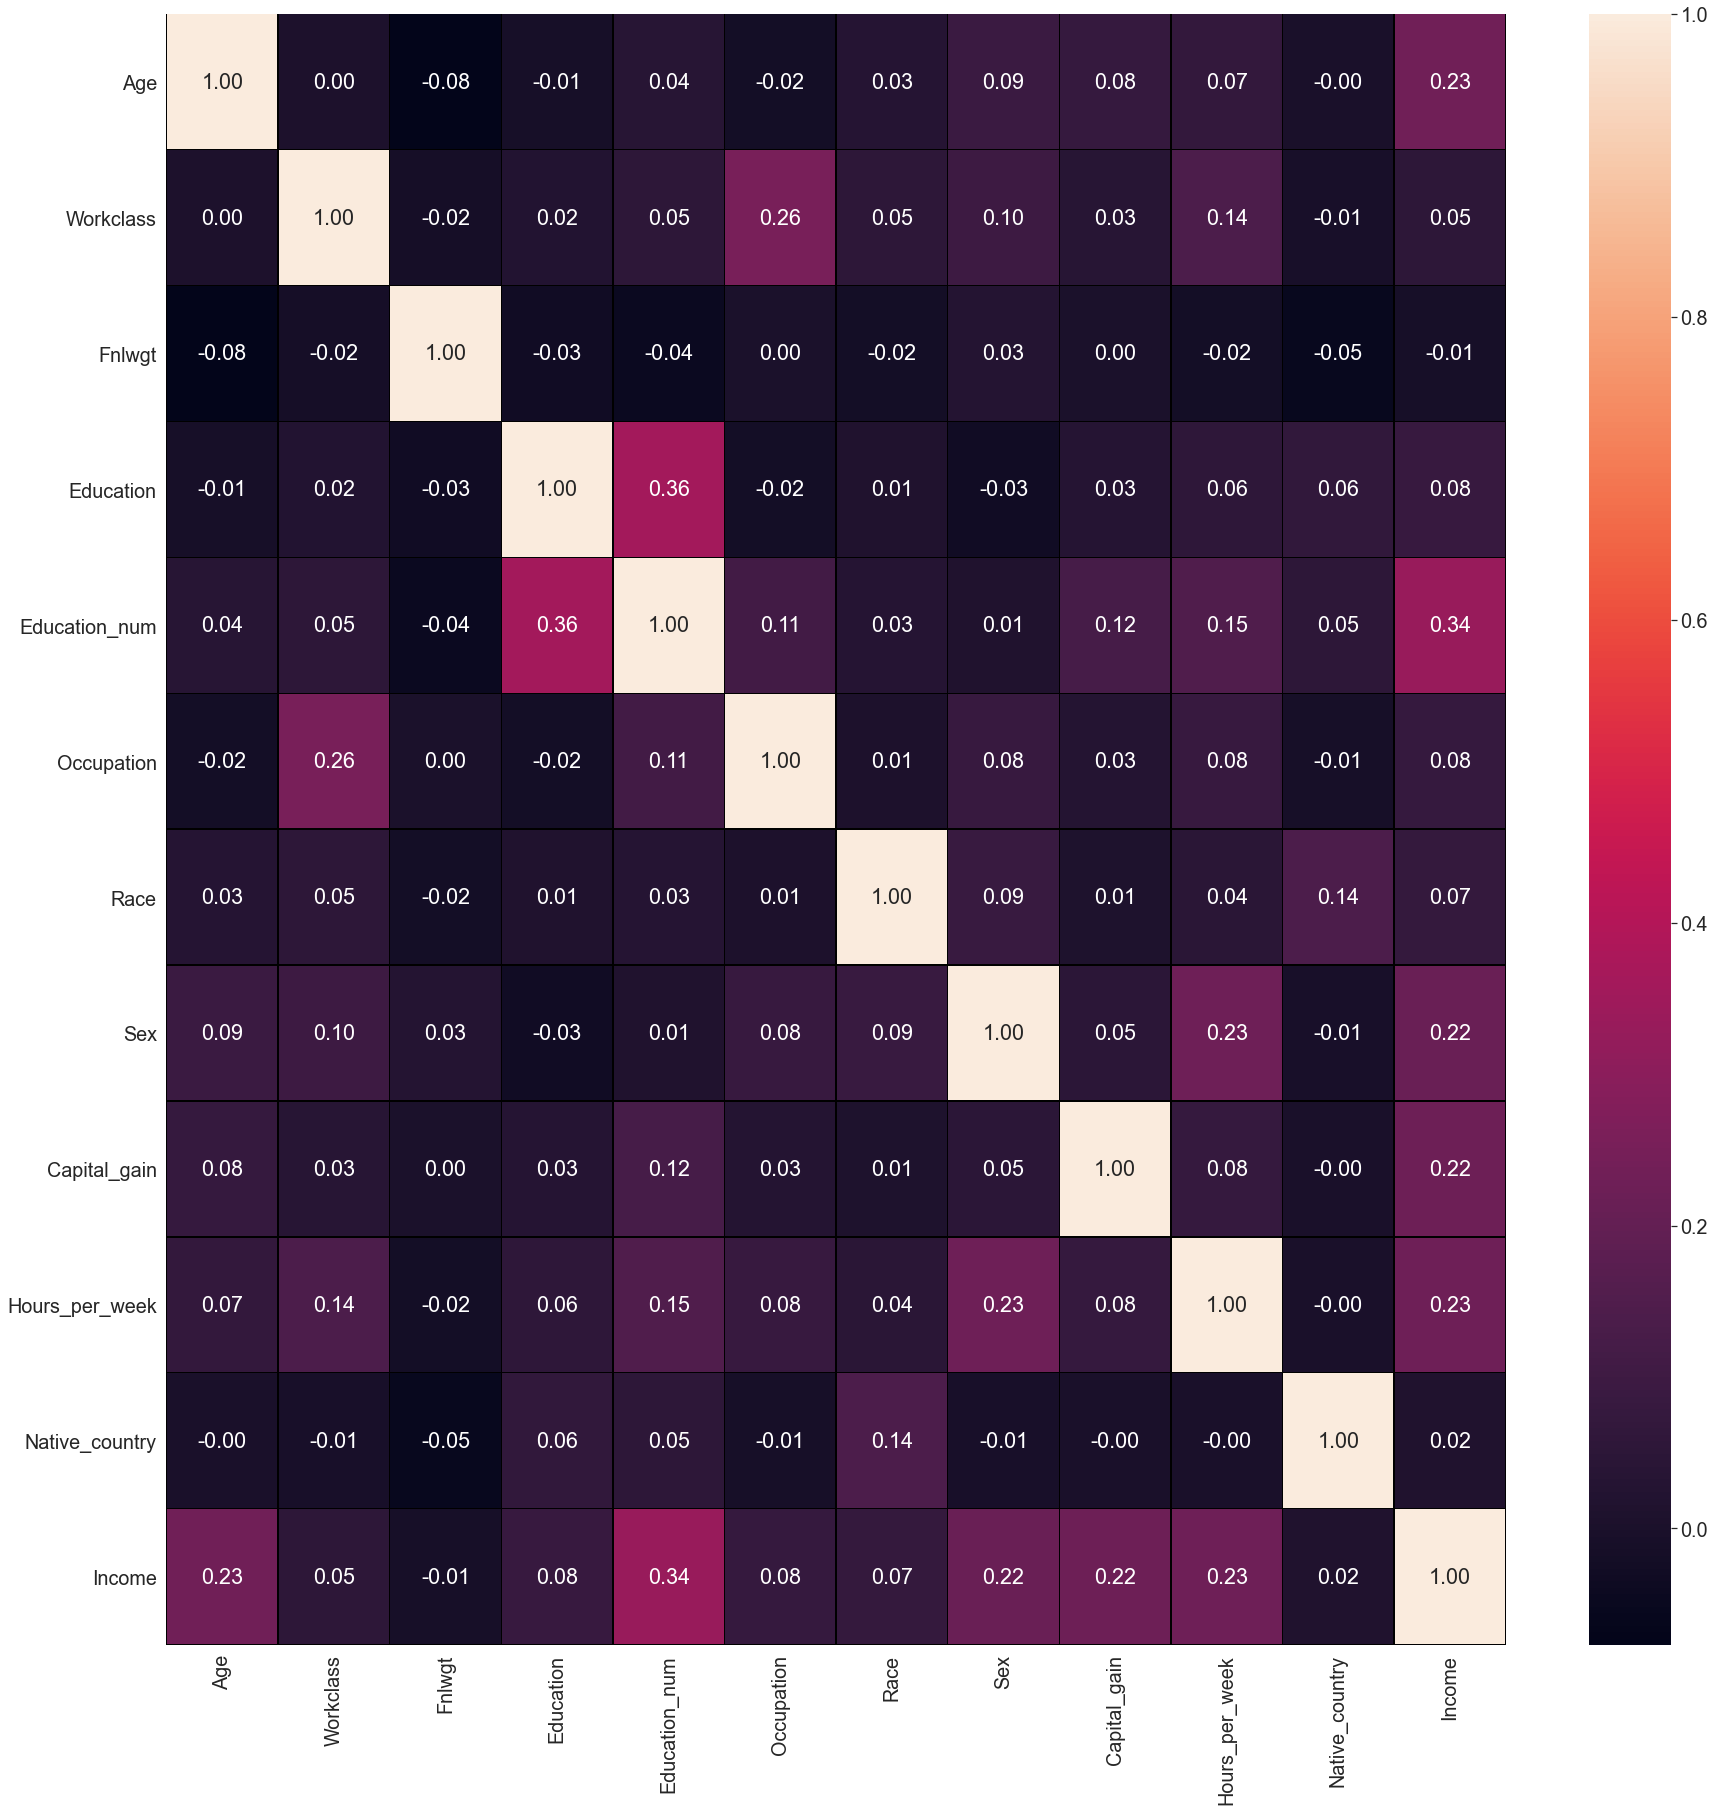

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

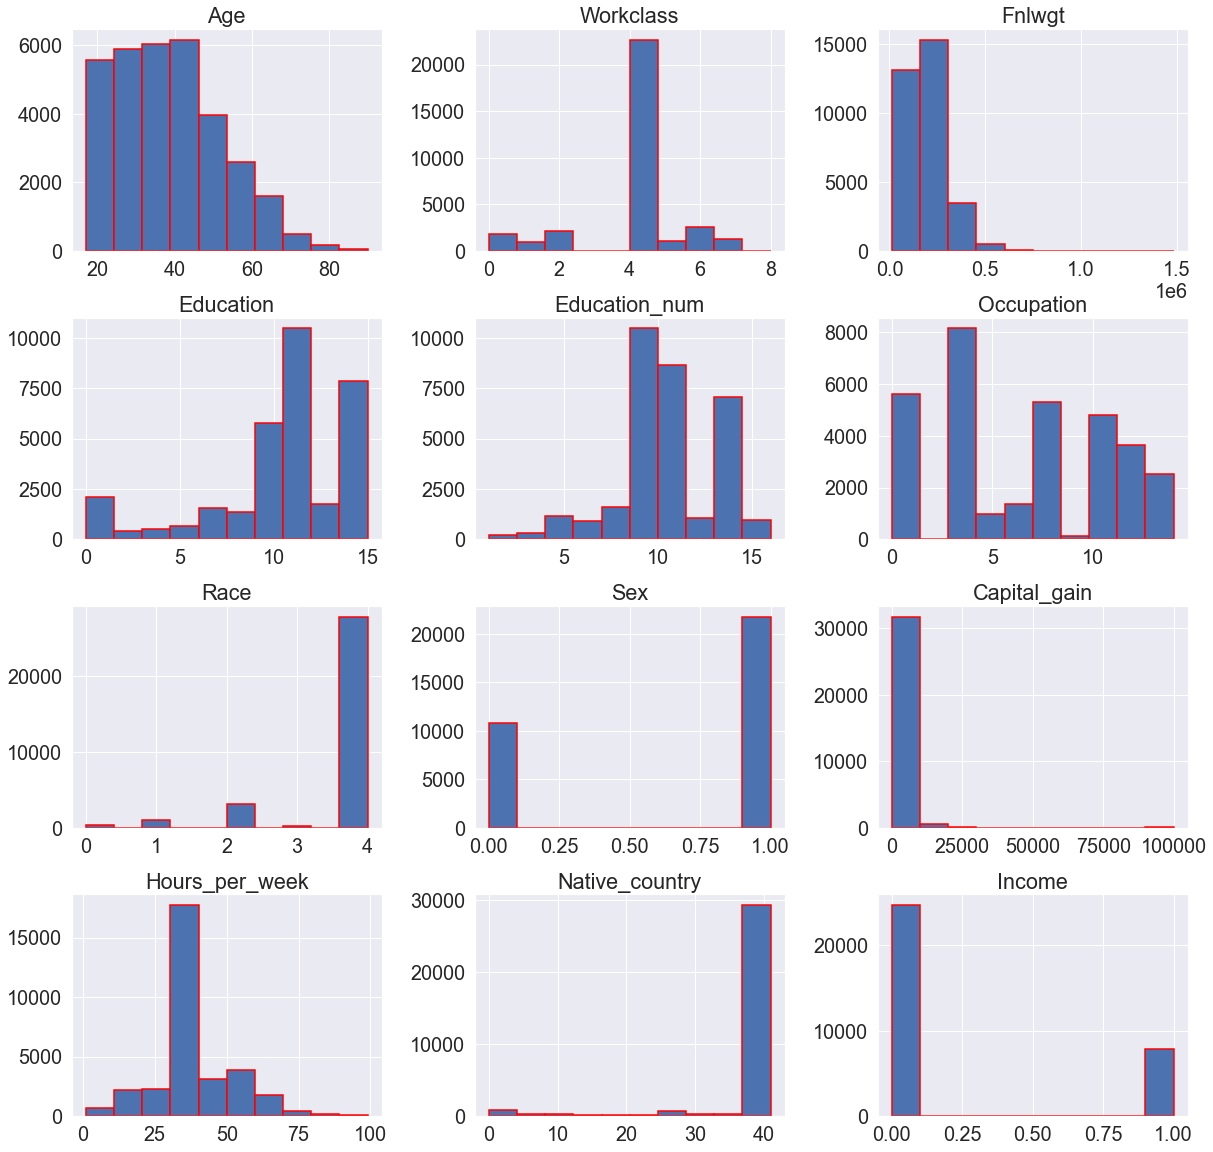

In [41]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

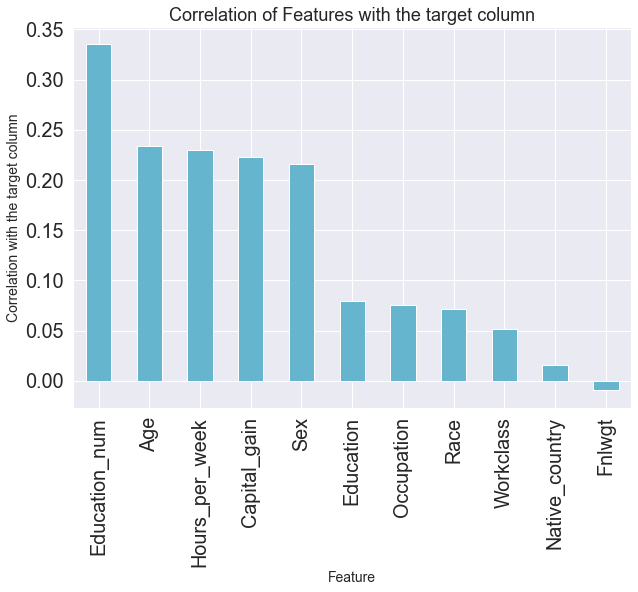

In [42]:
plt.figure(figsize=(10,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


# cheak the skewness:

In [43]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Occupation         0.114540
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

# Detecting outliers:

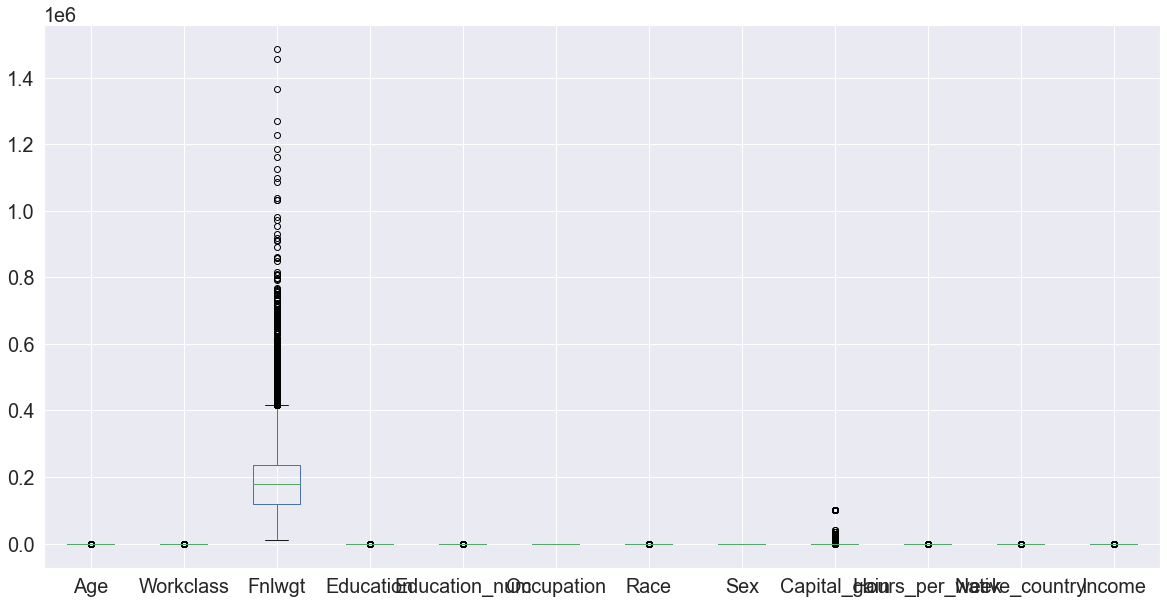

In [44]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1)

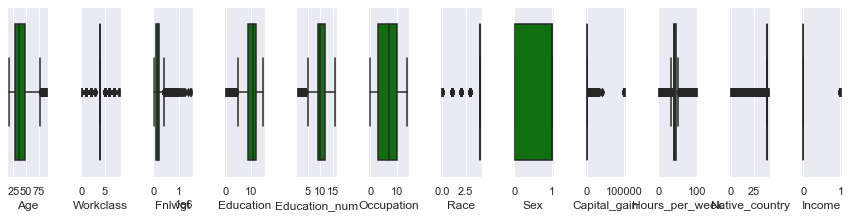

In [45]:
collist=df.columns.values
ncol=30
nrows=30
sns.set(font_scale=1)
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


# Check the percentage of data falls under outliers:

In [46]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([10,  9,  6, ...,  6,  6,  6], dtype=int64))

In [47]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,4,4,1,0,13,39,0
1,38,4,215646,11,9,6,4,1,0,40,39,0
2,53,4,234721,1,7,6,2,1,0,40,39,0
4,37,4,284582,12,14,4,4,0,0,40,39,0
5,49,4,160187,6,5,8,2,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,13,4,0,0,38,39,0
32556,40,4,154374,11,9,7,4,1,0,40,39,1
32557,58,4,151910,11,9,1,4,0,0,40,39,0
32558,22,4,201490,11,9,1,4,1,0,20,39,0


In [48]:
df.shape

(32560, 12)

In [49]:
df_new.shape

(28727, 12)

In [50]:
percentage_loss=((32560-28727)/32560)*100
print(percentage_loss)

11.772113022113022


Data loss is little higher,because outliers are present in dataset.

# Split the dataset in input columns and target columns..

In [84]:
x=df.drop('Income', axis=1)

In [85]:
y=df['Income']

In [86]:
x.shape

(32560, 11)

In [87]:
y.shape

(32560,)

# Removing skewness by transforming data.

In [88]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.30136989,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.30136989,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.30136989,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.30136989,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.30136989,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ...,  3.31823374,
        -0.03557001,  0.32907402]])

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194656,  1.64422286, -1.08988899, ..., -0.30136989,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ..., -0.30136989,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ..., -0.30136989,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -0.30136989,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ..., -0.30136989,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ...,  3.31823374,
        -0.03557001,  0.32907402]])

# Since the column has binary variable we will use logistic classification model¶
Regressor Model Building:

# Logistic Regression:

In [90]:
df_new.Income.value_counts()

0    21899
1     6828
Name: Income, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [94]:
np.bincount(y)

array([24719,  7841], dtype=int64)

In [95]:
y_train.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

In [96]:
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 13  The model performs very well
At random_state:- 13
Training accuracy_score is:- 81.24616093366093
Testing accuracy_score is:- 81.18857493857494
At random state 26  The model performs very well
At random_state:- 26
Training accuracy_score is:- 81.23848280098281
Testing accuracy_score is:- 81.21928746928747
At random state 31  The model performs very well
At random_state:- 31
Training accuracy_score is:- 81.28839066339066
Testing accuracy_score is:- 81.26535626535627
At random state 40  The model performs very well
At random_state:- 40
Training accuracy_score is:- 81.32678132678133
Testing accuracy_score is:- 81.31142506142506
At random state 52  The model performs very well
At random_state:- 52
Training accuracy_score is:- 81.26919533169533
Testing accuracy_score is:- 81.34213759213759
At random state 76  The model performs very well
At random_state:- 76
Training accuracy_score is:- 81.29222972972973
Testing accuracy_score is:- 81.2960687960688
At random state 89  The

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=290,test_size=0.20)

In [98]:
x_train.shape

(26048, 11)

In [99]:
y_train.shape

(26048,)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=849,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.8148034398034398

In [101]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))


Error:
Mean Absolute Error: 0.1851965601965602
Mean Squared Error: 0.1851965601965602
Root Mean Square Error: 0.4303446992778698


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4943
           1       0.70      0.41      0.52      1569

    accuracy                           0.81      6512
   macro avg       0.77      0.68      0.70      6512
weighted avg       0.80      0.81      0.80      6512



In [103]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 81.25
accuracy_score is :- 81.48034398034399


At cv:- 3
Cross validation score is :- 81.27764237419896
accuracy_score is :- 81.48034398034399


At cv:- 4
Cross validation score is :- 81.28071253071253
accuracy_score is :- 81.48034398034399


At cv:- 5
Cross validation score is :- 81.25921375921375
accuracy_score is :- 81.48034398034399


At cv:- 6
Cross validation score is :- 81.2469350199669
accuracy_score is :- 81.48034398034399


At cv:- 7
Cross validation score is :- 81.25922203616643
accuracy_score is :- 81.48034398034399


At cv:- 8
Cross validation score is :- 81.29914004914005
accuracy_score is :- 81.48034398034399


At cv:- 9
Cross validation score is :- 81.27456204133456
accuracy_score is :- 81.48034398034399




In [104]:
rscore=cross_val_score(lr,x,y,cv=5)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 81.27456204133456
accuracy_score is :- 81.48034398034399


In [105]:
lrs*100

81.48034398034399

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[4664  279]
 [ 927  642]]
0.8148034398034398
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4943
           1       0.70      0.41      0.52      1569

    accuracy                           0.81      6512
   macro avg       0.77      0.68      0.70      6512
weighted avg       0.80      0.81      0.80      6512



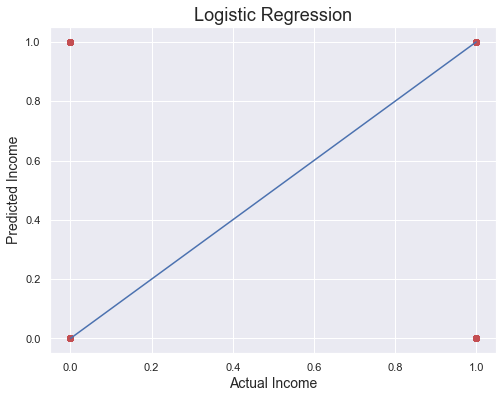

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Income',fontsize=14)
plt.ylabel('Predicted Income',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1. Ridge

In [109]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [110]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=0.0001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)
rds = r2_score(y_test,pred_rd)
for j in range(2,10):
    rds = r2_score(y_test,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: -3.8653137804109283
Cross Val Score: 80.91830466830467
At cv:- 3
R2 Score: -3.8653137804109283
Cross Val Score: 80.96438333238454
At cv:- 4
R2 Score: -3.8653137804109283
Cross Val Score: 80.95208845208846
At cv:- 5
R2 Score: -3.8653137804109283
Cross Val Score: 80.90601965601965
At cv:- 6
R2 Score: -3.8653137804109283
Cross Val Score: 80.93982291696875
At cv:- 7
R2 Score: -3.8653137804109283
Cross Val Score: 80.9214032477625
At cv:- 8
R2 Score: -3.8653137804109283
Cross Val Score: 80.91523341523342
At cv:- 9
R2 Score: -3.8653137804109283
Cross Val Score: 80.9213853864575


At cv:- 2
R2 Score: -5.9113247230667465
Cross Val Score: 80.97260923666124

In [111]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.18995700245700245
Mean Squared Error: 0.18995700245700245
Root Mean Square Error: 0.4358405699989418


In [112]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.8100429975429976
[[4741  202]
 [1035  534]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4943
           1       0.73      0.34      0.46      1569

    accuracy                           0.81      6512
   macro avg       0.77      0.65      0.67      6512
weighted avg       0.80      0.81      0.78      6512



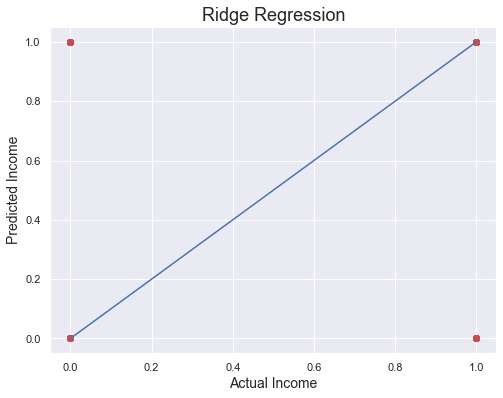

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Income',fontsize=14)
plt.ylabel('Predicted Income',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
DecisionTreeClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [115]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_features = 'sqrt')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(y_test,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: -24.772721323921274
Cross Val Score: 77.06388206388206
At cv:- 3
R2 Score: -24.772721323921274
Cross Val Score: 77.34030828574542
At cv:- 4
R2 Score: -24.772721323921274
Cross Val Score: 77.4539312039312
At cv:- 5
R2 Score: -24.772721323921274
Cross Val Score: 77.56756756756756
At cv:- 6
R2 Score: -24.772721323921274
Cross Val Score: 77.24511053828346
At cv:- 7
R2 Score: -24.772721323921274
Cross Val Score: 77.34336876093573
At cv:- 8
R2 Score: -24.772721323921274
Cross Val Score: 77.3495085995086
At cv:- 9
R2 Score: -24.772721323921274
Cross Val Score: 77.3740597401759


At cv:- 5
R2 Score: -24.772721323921274
Cross Val Score: 77.56756756756756

In [116]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))


Error:
Mean Absolute Error: 0.2281941031941032
Mean Squared Error: 0.2281941031941032
Root Mean Square Error: 0.47769666441592745


In [117]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.7718058968058968
[[4191  752]
 [ 734  835]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4943
           1       0.53      0.53      0.53      1569

    accuracy                           0.77      6512
   macro avg       0.69      0.69      0.69      6512
weighted avg       0.77      0.77      0.77      6512



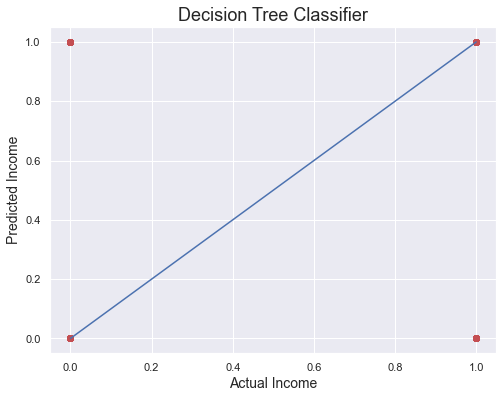

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Income',fontsize=14)
plt.ylabel('Predicted Income',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}


In [79]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=300,max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(y_test,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 0.005509060344799366
Cross Val Score: 82.4973075001474
At cv:- 3
R2 Score: 0.005509060344799366
Cross Val Score: 82.49034975020957
At cv:- 4
R2 Score: 0.005509060344799366
Cross Val Score: 82.64350241057781
At cv:- 5
R2 Score: 0.005509060344799366
Cross Val Score: 82.46599276539142
At cv:- 6
R2 Score: 0.005509060344799366
Cross Val Score: 82.64349873244026
At cv:- 7
R2 Score: 0.005509060344799366
Cross Val Score: 82.63304733249703
At cv:- 8
R2 Score: 0.005509060344799366
Cross Val Score: 82.63304015997903
At cv:- 9
R2 Score: 0.005509060344799366
Cross Val Score: 82.57387108741247


At cv:- 4
R2 Score: 0.005509060344799366
Cross Val Score: 82.64350241057781

In [80]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))


Error:
Mean Absolute Error: 0.17647058823529413
Mean Squared Error: 0.17647058823529413
Root Mean Square Error: 0.42008402520840293


In [81]:
print(accuracy_score(y_test,pred_random))
print(confusion_matrix(y_test,pred_random))
print(classification_report(y_test,pred_random))

0.8235294117647058
[[4068  363]
 [ 651  664]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4431
           1       0.65      0.50      0.57      1315

    accuracy                           0.82      5746
   macro avg       0.75      0.71      0.73      5746
weighted avg       0.81      0.82      0.82      5746



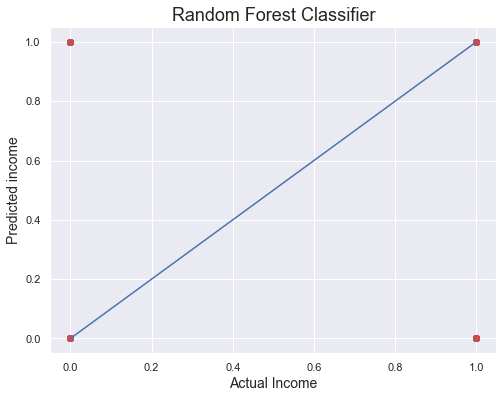

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Income',fontsize=14)
plt.ylabel('Predicted income',fontsize=14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsClassifier()
clf = GridSearchCV(kn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'uniform'}


In [192]:
kn = KNeighborsClassifier(algorithm = 'auto', weights = 'uniform',n_neighbors=25)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_k = kn.predict(x_test)


kns = r2_score(y_test,pred_k)
for j in range(2,10):
    print("At cv:-",j)

    kns = r2_score(y_test,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    knc = knscore.mean() 
    print('Cross Val Score:',knc*100)

At cv:- 2
R2 Score: -4.629344069994246
Cross Val Score: 81.6026800855326
At cv:- 3
R2 Score: -4.629344069994246
Cross Val Score: 81.7767278655007
At cv:- 4
R2 Score: -4.629344069994246
Cross Val Score: 81.64791000462986
At cv:- 5
R2 Score: -4.629344069994246
Cross Val Score: 81.53654701177828
At cv:- 6
R2 Score: -4.629344069994246
Cross Val Score: 81.58178548173929
At cv:- 7
R2 Score: -4.629344069994246
Cross Val Score: 81.52261119666228
At cv:- 8
R2 Score: -4.629344069994246
Cross Val Score: 81.59570331740835
At cv:- 9
R2 Score: -4.629344069994246
Cross Val Score: 81.54697980544522


At cv:- 3
R2 Score: -4.629344069994246
Cross Val Score: 81.7767278655007

In [193]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_k))
print('Mean Squared Error:',mean_squared_error(y_test,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_k)))


Error:
Mean Absolute Error: 0.18465019143752176
Mean Squared Error: 0.18465019143752176
Root Mean Square Error: 0.4297094267496604


In [194]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.8153498085624783
[[4077  354]
 [ 707  608]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4431
           1       0.63      0.46      0.53      1315

    accuracy                           0.82      5746
   macro avg       0.74      0.69      0.71      5746
weighted avg       0.80      0.82      0.80      5746



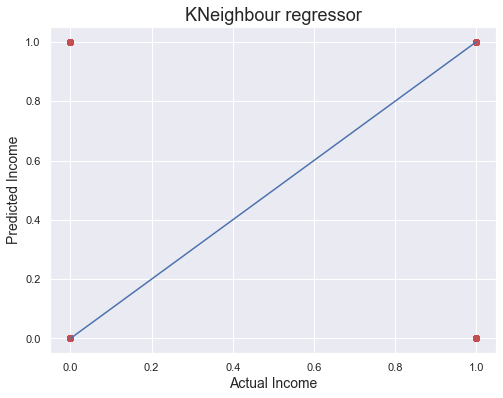

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_k, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Income',fontsize=14)
plt.ylabel('Predicted Income',fontsize=14)
plt.title('KNeighbour regressor',fontsize=18)
plt.show()


# We tested 5 models out of which Random forest Classifier performing good:

# plotting Auc-Roc curve..with Random forest Classifier  prediction..

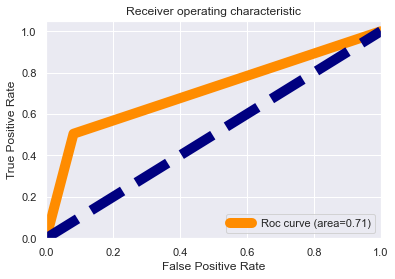

In [83]:
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(y_test,pred_random)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion:

In [213]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 0, ..., 0, 0, 1])

In [214]:
predicted=np.array(pred_random)
predicted

array([0, 0, 0, ..., 0, 0, 1])

In [215]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
5741,0,0
5742,0,0
5743,0,0
5744,0,0


In [216]:
df_com.sample(10)

,original,predicted
5727,0,0
5271,1,1
230,0,0
1259,0,0
3783,0,0
5455,1,0
4131,0,0
4145,1,1
3194,0,0
2865,0,0


# The best model is Random forest Classifier as CV score is best from above tested models.

In [208]:
rfscore=cross_val_score(rf,x,y,cv=4)
print("Cross validation score is :-",rfc*100)
print("Accuracy Score:-",(accuracy_score(y_test,pred_random)*100))

Cross validation score is :- 82.54950352482061
Accuracy Score:- 82.42255482074486


Our Model performs with Accuracy Score 82.42%...

# Saving the best models with initials...using pickle library

In [218]:
import pickle
filename = 'Income_prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))